In [1]:
# imports

import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In /home/emilio/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emilio/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emilio/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/emilio/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emilio/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
from machine_learning.dataset.dataset_1600 import dataset

In [3]:
print(len(dataset))

1094


In [4]:
def separates(sep_point):
    if sep_point == 1.0:
        return 0
    else:
        return 1

In [5]:
clean_X = np.array(list(map(lambda x: [x[1], x[2]], dataset)))

In [6]:
clean_y = np.array(list(map(lambda x: x[6], dataset)))

In [7]:
train_X, test_X, train_y, test_y = train_test_split(clean_X, clean_y, test_size=0.20, random_state=42)

In [8]:
train_X_0, train_X_1, train_y_0, train_y_1 = train_test_split(train_X, train_y, test_size = 0.005)

In [9]:
train_y_sep = np.array(list(map(separates, train_y_0)))
test_y_sep = np.array(list(map(separates, test_y)))

In [10]:
train_y_sep

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [60]:
# Quick baseline

xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=18, eta=0.1, subsample=1, colsample_bytree=1)
xgb_classify_model = xgb.XGBClassifier(n_estimators=1000, max_depth=18, eta=0.1, subsample=1, colsample_bytree=1)


In [61]:
train_y_sep

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [62]:
xgb_model.fit(train_X_0, train_y_0)
xgb_classify_model.fit(train_X_0, train_y_sep)

[17:08:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(eta=0.1, max_depth=18, n_estimators=1000)

In [63]:
def loss(y, yhat):
    return np.sqrt(np.mean((y-yhat)**2))

In [64]:
y_hat = xgb_model.predict(test_X)
y_hat_sep = xgb_classify_model.predict(test_X)

In [65]:
y_hat_sep

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [66]:
loss(y_hat, test_y)

0.03620445060980386

In [59]:
loss(y_hat_sep, test_y_sep)

0.11704114719613055

In [19]:
test_y_sep

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [20]:
y_hat_sep

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [21]:
# Let's give it an extra boost



In [22]:
feat_1 = list(map(lambda x: x[0], train_X_0 ))
feat_2 = list(map(lambda x: x[1], train_X_0 ))
color = train_y_sep

In [23]:
def get_color(y):
    if y>0.98:
        return 0.0
    else:
        return y

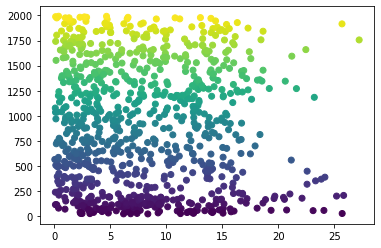

In [24]:
plt.scatter(feat_1, feat_2, c=feat_2)

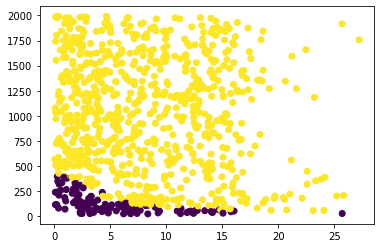

In [25]:
plt.scatter(feat_1, feat_2, c=color)

In [26]:
############### Let's build a Neural Network model next

In [27]:
train_X[3]

array([  7.7627152, 571.6975814])

In [28]:
aoa_mean = np.mean(list(map(lambda x: x[0], train_X_0)))
re_mean = np.mean(list(map(lambda x: x[1], train_X_0)))
aoa_std = np.std(list(map(lambda x: x[0], train_X_0)))
re_std = np.std(list(map(lambda x: x[1], train_X_0)))

In [29]:
def scale(arr, mean, std):
    return (arr - mean) / std
    
def unscale(arr, mean, std):
    return (arr * std) + mean

In [30]:
normalized_aoa = scale(list(map(lambda x: x[0], train_X_0)), aoa_mean, aoa_std)

In [31]:
np.std(normalized_aoa)

0.9999999999999999

In [32]:
np.std(unscale(normalized_aoa, aoa_mean, aoa_std))

5.600816702995909

In [33]:
normalized_re = scale(list(map(lambda x: x[1], train_X_0)), re_mean, re_std)

In [34]:
normalized_train_X_0 = np.array(list(zip(normalized_aoa, normalized_re)))

In [35]:
def normalize_input_data(data, aoa_mean=None, aoa_std=None, re_mean=None, re_std=None):
    if aoa_mean == None:
        aoa_mean = np.mean(list(map(lambda x: x[0], data)))
    if re_mean == None:
        re_mean = np.mean(list(map(lambda x: x[1], data)))
    if aoa_std == None:
        aoa_std = np.std(list(map(lambda x: x[0], data)))
    if re_std == None:
        re_std = np.std(list(map(lambda x: x[1], data)))
    normalized_aoa = scale(list(map(lambda x: x[0], data)), aoa_mean, aoa_std)
    normalized_re = scale(list(map(lambda x: x[1], data)), re_mean, re_std)
    return np.array(list(zip(normalized_aoa, normalized_re)))

In [36]:
normalized_train_X_0 = normalize_input_data(train_X_0)
normalized_test_X = normalize_input_data(test_X, aoa_mean, aoa_std, re_mean, re_std)

In [47]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
nn_regression_model = Sequential()
nn_regression_model.add(Dense(2, input_dim=2))
nn_regression_model.add(Dense(10, activation='elu'))
nn_regression_model.add(Dropout(0.25))
nn_regression_model.add(Dense(6, activation='elu'))
nn_regression_model.add(Dropout(0.25))
nn_regression_model.add(Dense(3, activation='elu'))
nn_regression_model.add(Dropout(0.25))
nn_regression_model.add(Dense(3, activation='elu'))
nn_regression_model.add(Dropout(0.25))
nn_regression_model.add(Dense(2, activation='elu'))
nn_regression_model.add(Dense(1))

In [48]:
nn_regression_model.compile(optimizer='sgd', loss=root_mean_squared_error)

In [49]:
history = nn_regression_model.fit(normalized_train_X_0, train_y_0, epochs=500, batch_size=1, validation_data=(normalized_test_X, test_y))

Train on 870 samples, validate on 219 samples
Epoch 1/500
870/870 [==============================] - 24s 28ms/step - loss: 0.1750 - val_loss: 0.1115
Epoch 2/500
870/870 [==============================] - 19s 22ms/step - loss: 0.1385 - val_loss: 0.0961
Epoch 3/500
870/870 [==============================] - 21s 24ms/step - loss: 0.1327 - val_loss: 0.0931
Epoch 4/500
870/870 [==============================] - 20s 23ms/step - loss: 0.1279 - val_loss: 0.0915
Epoch 5/500
870/870 [==============================] - 20s 23ms/step - loss: 0.1238 - val_loss: 0.0981
Epoch 6/500
870/870 [==============================] - 20s 23ms/step - loss: 0.1217 - val_loss: 0.1094
Epoch 7/500
870/870 [==============================] - 20s 22ms/step - loss: 0.1198 - val_loss: 0.0967
Epoch 8/500
870/870 [==============================] - 18s 21ms/step - loss: 0.1246 - val_loss: 0.0977
Epoch 9/500
870/870 [==============================] - 19s 22ms/step - loss: 0.1210 - val_loss: 0.0966
Epoch 10/500
870/870 [=====

870/870 [==============================] - 21s 24ms/step - loss: 0.0979 - val_loss: 0.0529
Epoch 80/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0943 - val_loss: 0.0704
Epoch 81/500
870/870 [==============================] - 20s 23ms/step - loss: 0.1014 - val_loss: 0.0692
Epoch 82/500
870/870 [==============================] - 20s 23ms/step - loss: 0.1033 - val_loss: 0.0507
Epoch 83/500
870/870 [==============================] - 21s 24ms/step - loss: 0.0973 - val_loss: 0.0570
Epoch 84/500
870/870 [==============================] - 21s 24ms/step - loss: 0.0938 - val_loss: 0.0654
Epoch 85/500
870/870 [==============================] - 21s 24ms/step - loss: 0.0986 - val_loss: 0.0477
Epoch 86/500
870/870 [==============================] - 20s 23ms/step - loss: 0.0955 - val_loss: 0.0780
Epoch 87/500
870/870 [==============================] - 20s 23ms/step - loss: 0.0974 - val_loss: 0.0546
Epoch 88/500
870/870 [==============================] - 21s 24ms/step - loss:

870/870 [==============================] - 18s 20ms/step - loss: 0.0950 - val_loss: 0.0625
Epoch 158/500
870/870 [==============================] - 21s 24ms/step - loss: 0.0905 - val_loss: 0.0567
Epoch 159/500
870/870 [==============================] - 21s 24ms/step - loss: 0.0910 - val_loss: 0.0647
Epoch 160/500
870/870 [==============================] - 21s 24ms/step - loss: 0.0869 - val_loss: 0.0641
Epoch 161/500
870/870 [==============================] - 20s 23ms/step - loss: 0.0900 - val_loss: 0.0614
Epoch 162/500
870/870 [==============================] - 21s 24ms/step - loss: 0.0880 - val_loss: 0.0600
Epoch 163/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0908 - val_loss: 0.0513
Epoch 164/500
870/870 [==============================] - 20s 23ms/step - loss: 0.0909 - val_loss: 0.0709
Epoch 165/500
870/870 [==============================] - 19s 22ms/step - loss: 0.0880 - val_loss: 0.0660
Epoch 166/500
870/870 [==============================] - 20s 23ms/ste

870/870 [==============================] - 17s 20ms/step - loss: 0.0910 - val_loss: 0.0422
Epoch 236/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0901 - val_loss: 0.0532
Epoch 237/500
870/870 [==============================] - 19s 22ms/step - loss: 0.0878 - val_loss: 0.0452
Epoch 238/500
870/870 [==============================] - 19s 22ms/step - loss: 0.0878 - val_loss: 0.0539
Epoch 239/500
870/870 [==============================] - 18s 20ms/step - loss: 0.0920 - val_loss: 0.0748
Epoch 240/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0900 - val_loss: 0.0562
Epoch 241/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0925 - val_loss: 0.0644
Epoch 242/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0923 - val_loss: 0.0427
Epoch 243/500
870/870 [==============================] - 18s 20ms/step - loss: 0.0915 - val_loss: 0.0462
Epoch 244/500
870/870 [==============================] - 18s 21ms/ste

870/870 [==============================] - 17s 20ms/step - loss: 0.0886 - val_loss: 0.0538
Epoch 314/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0888 - val_loss: 0.0459
Epoch 315/500
870/870 [==============================] - 18s 20ms/step - loss: 0.0863 - val_loss: 0.0503
Epoch 316/500
870/870 [==============================] - 18s 20ms/step - loss: 0.0864 - val_loss: 0.0717
Epoch 317/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0899 - val_loss: 0.0556
Epoch 318/500
870/870 [==============================] - 18s 20ms/step - loss: 0.0875 - val_loss: 0.0449
Epoch 319/500
870/870 [==============================] - 16s 19ms/step - loss: 0.0858 - val_loss: 0.0837
Epoch 320/500
870/870 [==============================] - 19s 21ms/step - loss: 0.0903 - val_loss: 0.0550
Epoch 321/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0918 - val_loss: 0.0416
Epoch 322/500
870/870 [==============================] - 17s 20ms/ste

870/870 [==============================] - 19s 22ms/step - loss: 0.0883 - val_loss: 0.0720
Epoch 392/500
870/870 [==============================] - 17s 19ms/step - loss: 0.0912 - val_loss: 0.0500
Epoch 393/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0904 - val_loss: 0.0591
Epoch 394/500
870/870 [==============================] - 19s 21ms/step - loss: 0.0855 - val_loss: 0.0485
Epoch 395/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0858 - val_loss: 0.0438
Epoch 396/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0881 - val_loss: 0.0721
Epoch 397/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0872 - val_loss: 0.0588
Epoch 398/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0933 - val_loss: 0.0501
Epoch 399/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0905 - val_loss: 0.0450
Epoch 400/500
870/870 [==============================] - 18s 21ms/ste

870/870 [==============================] - 18s 20ms/step - loss: 0.0891 - val_loss: 0.0668
Epoch 470/500
870/870 [==============================] - 17s 20ms/step - loss: 0.0894 - val_loss: 0.0641
Epoch 471/500
870/870 [==============================] - 17s 20ms/step - loss: 0.0881 - val_loss: 0.0470
Epoch 472/500
870/870 [==============================] - 18s 20ms/step - loss: 0.0881 - val_loss: 0.0719
Epoch 473/500
870/870 [==============================] - 17s 20ms/step - loss: 0.0883 - val_loss: 0.0391
Epoch 474/500
870/870 [==============================] - 17s 20ms/step - loss: 0.0883 - val_loss: 0.0623
Epoch 475/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0856 - val_loss: 0.0553
Epoch 476/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0881 - val_loss: 0.0764
Epoch 477/500
870/870 [==============================] - 18s 21ms/step - loss: 0.0914 - val_loss: 0.0473
Epoch 478/500
870/870 [==============================] - 18s 20ms/ste

In [50]:
history.history

{'val_loss': [0.1114669544919985,
  0.09612983104572993,
  0.09312475857125026,
  0.09151968217059357,
  0.09807337643621175,
  0.1093917463876341,
  0.09667928435214579,
  0.09766637986381305,
  0.09662294843697657,
  0.1096488692580837,
  0.07803778295919775,
  0.08012479414406433,
  0.07886692956430183,
  0.10160316125442993,
  0.07340316379179149,
  0.08404177570179718,
  0.07626975038552393,
  0.07555235065009495,
  0.0676502820155392,
  0.08739658679864178,
  0.08388812595034299,
  0.07455875918473283,
  0.07693239032677864,
  0.08869957644917649,
  0.0937302128228967,
  0.0955379373270627,
  0.07230023168809882,
  0.063152494155653,
  0.07744352056827719,
  0.07130343286686291,
  0.0727748889220904,
  0.06328224121979927,
  0.054974321292959934,
  0.0657796058888849,
  0.0631966508550731,
  0.08437446868855115,
  0.06734234291941063,
  0.06286565632852789,
  0.08067875467751125,
  0.07921756627080648,
  0.08247741410449215,
  0.07057329216232039,
  0.06911614026925335,
  0.09219

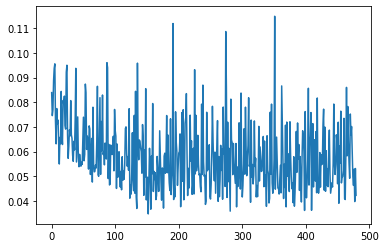

In [51]:
#plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])

In [47]:
test_y.reshape(-1, 1)

array([[0.48238908],
       [0.52062164],
       [0.94725966],
       [0.86117833],
       [0.36815425],
       [0.5640435 ],
       [0.49272632],
       [0.7221567 ],
       [0.53370528],
       [0.45544284],
       [0.27796461],
       [0.3109666 ],
       [0.57524197],
       [1.        ],
       [0.54466858],
       [1.        ],
       [0.41472641],
       [0.22611083],
       [1.        ],
       [0.65484001],
       [0.31643779],
       [0.75338143],
       [0.43158196],
       [0.72083866],
       [0.74009685],
       [0.82031881],
       [0.32681641],
       [0.80628092],
       [0.70113285],
       [0.59797714],
       [0.58832694],
       [0.38555854],
       [0.23304827],
       [0.46442577],
       [0.4476721 ],
       [0.35944655],
       [0.20639527],
       [0.63531398],
       [0.37037799],
       [0.74621229],
       [0.40467635],
       [0.60410395],
       [0.53626938],
       [0.55098507],
       [0.64357223],
       [0.67617741],
       [1.        ],
       [0.225

In [510]:
test_y = test_y.reshape(-1, 1)

In [511]:
test_y.shape

(153, 1)

In [512]:
normalized_test_X.shape

(153, 2)

In [456]:
nn_regression_model.evaluate(normalized_test_X, test_y.reshape(-1,1))

153/153 [==============================] - 0s 281us/step


0.06630284509627647

In [461]:
nn_y_hat = nn_regression_model.predict(normalized_test_X)

In [463]:
loss(nn_y_hat, test_y)

0.06727551494522278

In [457]:
nn_y_hat

array([[0.9181886 ],
       [0.4889084 ],
       [0.40293854],
       [0.34933594],
       [0.34616268],
       [0.54218036],
       [0.5707635 ],
       [0.3497627 ],
       [0.5455651 ],
       [0.55160445],
       [0.45163423],
       [0.38549358],
       [0.34072512],
       [0.5282803 ],
       [0.9251765 ],
       [0.6669915 ],
       [0.5185026 ],
       [0.7306971 ],
       [0.3516066 ],
       [0.6372754 ],
       [0.5703931 ],
       [0.3572819 ],
       [0.45676988],
       [0.8949043 ],
       [0.5969509 ],
       [0.8557297 ],
       [0.87802076],
       [0.84403384],
       [0.3618564 ],
       [0.34706113],
       [0.76304454],
       [0.56673867],
       [0.9201263 ],
       [0.6461513 ],
       [0.33590412],
       [0.28490636],
       [0.6472716 ],
       [0.37886798],
       [0.35626847],
       [0.45383823],
       [0.9253788 ],
       [0.5280848 ],
       [0.5366023 ],
       [0.5522563 ],
       [0.37928438],
       [0.86925447],
       [0.5420133 ],
       [0.513

In [440]:
test_y

array([1.        , 0.54501689, 0.38713097, 0.23685368, 0.23304827,
       0.60410395, 0.615605  , 0.25297941, 0.59797714, 0.6343405 ,
       0.41472641, 0.33223349, 0.22611083, 0.52731679, 1.        ,
       0.74009685, 0.5640435 , 0.68522499, 0.27483291, 0.650858  ,
       0.63817012, 0.25722573, 0.45470381, 1.        , 0.5016529 ,
       1.        , 1.        , 0.84079054, 0.29393561, 0.2496301 ,
       0.5972936 , 0.60631116, 1.        , 0.71955657, 0.2550733 ,
       0.09032166, 0.72371185, 0.32371489, 0.28788385, 0.42753973,
       1.        , 0.57934162, 0.57250998, 0.57015607, 0.31692867,
       0.89726727, 0.52487198, 0.58132868, 1.        , 0.73579722,
       0.51440307, 0.48622842, 0.20234911, 0.64070695, 0.36813709,
       1.        , 0.84205488, 0.80628092, 0.75309539, 0.38045717,
       0.54387047, 0.35263237, 0.74612017, 0.5685466 , 0.29554906,
       0.89643737, 0.4036875 , 0.52956348, 0.60574341, 1.        ,
       1.        , 0.24933331, 0.35392972, 1.        , 0.64081

In [492]:
loss(nn_y_hat, test_y)

0.06727551494522278

In [464]:
###############  Finally, a K-Nearest Neighbor model

In [488]:
from sklearn import neighbors

n_neighbors = 1


knn_regression_model = neighbors.KNeighborsRegressor(n_neighbors)
knn_regression_model.fit(train_X_0, train_y_0)

KNeighborsRegressor(n_neighbors=1)

In [489]:
knn_y_hat = (knn_regression_model.predict(test_X)).reshape(-1, 1)

In [490]:
knn_y_hat.shape

(153, 1)

In [491]:
loss(knn_y_hat, test_y)

0.13902518280675247

In [206]:
# Now we combine the greater certainty of the classifier to fix regression 1's values

def boost_predictions(regression_preds, classification_preds):
    return ((regression_preds-1)*classification_preds)+1

In [209]:
y_hat_boosted = boost_predictions(y_hat, y_hat_sep)
nn_y_hat_boosted = boost_predictions(nn_y_hat, y_hat_sep)
knn_y_hat_boosted = boost_predictions(knn_y_hat, y_hat_sep)


In [208]:
loss(y_hat_boosted, test_y)

0.037152345517145136

In [210]:
loss(nn_y_hat_boosted, test_y)

0.2376277390736039

In [211]:
loss(knn_y_hat_boosted, test_y)

0.1811940116657541

In [212]:
percent_boost_improvement = (loss(y_hat, test_y)-loss(y_hat_boosted, test_y))/loss(y_hat, test_y)*100
print("Boost improvement: " + str(percent_boost_improvement) + " %")

Boost improvement: 12.051220657383295 %


In [262]:
######## Stacking

In [284]:
# input for the next level in the stack is original input data + predictions for the three models = 5-d vectors

len(train_X_1)
xgb_preds_1 = xgb_model.predict(train_X_1)
nn_preds_1 = np.array(list(map(lambda x: x[0], nn_regression_model.predict(train_X_1))))
knn_preds_1 = knn_regression_model.predict(train_X_1)
feats_1_1 = np.array(list(map(lambda x: x[0], train_X_1)))
feats_2_1 = np.array(list(map(lambda x: x[1], train_X_1)))
train_X_stack = np.array(list(zip(feats_1_1, feats_2_1, xgb_preds_1, nn_preds_1, knn_preds_1)))
train_y_stack = train_y_1

In [283]:
train_X_stack[2]

array([5.23978103e+00, 7.73287260e+02, 5.57805061e-01, 5.56716084e-01,
       5.52981116e-01])

In [285]:
train_y_1[2]

0.5592971078305247

In [287]:
stacked_model = xgb.XGBRegressor(n_estimators=1000, max_depth=12, eta=0.1, subsample=1, colsample_bytree=1)

In [288]:
stacked_model.fit(train_X_stack, train_y_stack)

[13:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.1, max_depth=12, n_estimators=1000)

In [ ]:
# Test stack performance

In [290]:
xgb_test = xgb_model.predict(test_X)
nn_test = np.array(list(map(lambda x: x[0], nn_regression_model.predict(test_X))))
knn_test = knn_regression_model.predict(test_X)
feats_1_test = np.array(list(map(lambda x: x[0], test_X)))
feats_2_test = np.array(list(map(lambda x: x[1], test_X)))
test_X_stack = np.array(list(zip(feats_1_test, feats_2_test, xgb_test, nn_test, knn_test)))
test_y_stack = test_y

In [291]:
y_hat_stack = stacked_model.predict(test_X_stack)

In [292]:
loss(y_hat_stack, test_y)

0.03840394324141504

In [43]:
def predict_sep_points(aoa, re, mc, mcp, thick):
    x_in = pd.DataFrame(data=[[aoa, re, mc, mcp, thick]], columns=['aoa', 'Re', 'mc', 'mcp', 'th'])
    y_hat = model_u.predict(x_in)[0]
    separates = classify_model.predict(x_in)[0]
    return ((y_hat-1)*separates)+1

In [48]:
predict_sep_points(8, 6000000, 4.5, 60, 26)

0.00446850061416626

In [29]:
np.array([4, 3000, 10, 15, 30])

array([   4, 3000,   10,   15,   30])

In [31]:
a = np.array([np.array([4, 3000, 10, 15, 30])])

In [37]:
a = pd.DataFrame(data=[[4, 3000, 10, 15, 30]], columns=['aoa', 'Re', 'mc', 'mcp', 'th'])

In [38]:
model_u.predict(a)

array([0.22209579], dtype=float32)